Based on https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html

In [1]:
!pip install --q scanpy
!pip install --q anndata
!pip install --q pooch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.5 MB/s eta 0:00:00


In [2]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

# Data retrieval
import pooch

In [23]:
sc.settings.set_figure_params(dpi=75, facecolor="white")

# Import Data

In [4]:
EXAMPLE_DATA = pooch.create(
    path=pooch.os_cache("scverse_tutorials"),
    base_url="doi:10.6084/m9.figshare.22716739.v1/",
)
EXAMPLE_DATA.load_registry_from_doi()

In [5]:
samples = {
    "s1d1": "s1d1_filtered_feature_bc_matrix.h5",
    "s1d3": "s1d3_filtered_feature_bc_matrix.h5",
}
adatas = {}

for sample_id, filename in samples.items():
    path = EXAMPLE_DATA.fetch(filename)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_n

In [9]:
print(path)
print(sample_adata)
print(adata)

/root/.cache/scverse_tutorials/s1d3_filtered_feature_bc_matrix.h5
AnnData object with n_obs × n_vars = 8340 × 36601
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence'
AnnData object with n_obs × n_vars = 17125 × 36601
    obs: 'sample'


In [12]:
sample_adata.to_df()

MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  \
AAACCCAAGAAGTGTT-1          0.0      0.0    0.0         0.0         0.0   
AAACCCAAGCTGACTT-1          0.0      0.0    0.0         0.0         0.0   
AAACCCACAAATGGCG-1          0.0      0.0    0.0         0.0         0.0   
AAACCCACATAGAATG-1          0.0      0.0    0.0         0.0         0.0   
AAACCCAGTCTTCTAT-1          0.0      0.0    0.0         0.0         0.0   
...                         ...      ...    ...         ...         ...   
TTTGTTGAGAGTCTGG-1          0.0      0.0    0.0         0.0         0.0   
TTTGTTGCAGACAATA-1          0.0      0.0    0.0         0.0         0.0   
TTTGTTGCATGTTACG-1          0.0      0.0    0.0         0.0         0.0   
TTTGTTGGTAGTCACT-1          0.0      0.0    0.0         0.0         0.0   
TTTGTTGTCGCGCTGA-1          0.0      0.0    0.0         0.0         0.0   

                    AL627309.2  AL627309.5  AL627309.4  AP006222.2  \
AAACCCAAGAAGTGTT-1         0.0         0.0         0.0         0.0   
AAACCCAAGCTGACTT-1         0.0         0.0         0.0         0.0   
AAACCCACAAATGGCG-1         0.0         1.0         0.0         0.0   
AAACCCACATAGAATG-1         0.0         0.0         0.0         0.0   
AAACCCAGTCTTCTAT-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTTGTTGAGAGTCTGG-1         0.0         0.0         0.0         0.0   
TTTGTTGCAGACAATA-1         0.0         0.0         0.0         0.0   
TTTGTTGCATGTTACG-1         0.0         0.0         0.0         0.0   
TTTGTTGGTAGTCACT-1         0.0         0.0         0.0         0.0   
TTTGTTGTCGCGCTGA-1         0.0         0.0         0.0         0.0   

                    AL732372.1  ...  AC133551.1  AC136612.1  AC136616.1  \
AAACCCAAGAAGTGTT-1         0.0  ...         0.0         0.0         0.0   
AAACCCAAGCTGACTT-1         0.0  ...         0.0         0.0         0.0   
AAACCCACAAATGGCG-1         0.0  ...         0.0         0.0         0.0   
AAACCCACATAGAATG-1         0.0  ...         0.0         0.0         0.0   
AAACCCAGTCTTCTAT-1         0.0  ...         0.0         0.0         0.0   
...                        ...  ...         ...         ...         ...   
TTTGTTGAGAGTCTGG-1         0.0  ...         0.0         0.0         0.0   
TTTGTTGCAGACAATA-1         0.0  ...         0.0         0.0         0.0   
TTTGTTGCATGTTACG-1         0.0  ...         0.0         0.0         0.0   
TTTGTTGGTAGTCACT-1         0.0  ...         0.0         0.0         0.0   
TTTGTTGTCGCGCTGA-1         0.0  ...         0.0         0.0         0.0   

                    AC136616.3  AC136616.2  AC141272.1  AC023491.2  \
AAACCCAAGAAGTGTT-1         0.0         0.0         0.0         0.0   
AAACCCAAGCTGACTT-1         0.0         0.0         0.0         0.0   
AAACCCACAAATGGCG-1         0.0         0.0         0.0         0.0   
AAACCCACATAGAATG-1         0.0         0.0         0.0         0.0   
AAACCCAGTCTTCTAT-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTTGTTGAGAGTCTGG-1         0.0         0.0         0.0         0.0   
TTTGTTGCAGACAATA-1         0.0         0.0         0.0         0.0   
TTTGTTGCATGTTACG-1         0.0         0.0         0.0         0.0   
TTTGTTGGTAGTCACT-1         0.0         0.0         0.0         0.0   
TTTGTTGTCGCGCTGA-1         0.0         0.0         0.0         0.0   

                    AC007325.1  AC007325.4  AC007325.2  
AAACCCAAGAAGTGTT-1         0.0         0.0         0.0  
AAACCCAAGCTGACTT-1         0.0         0.0         0.0  
AAACCCACAAATGGCG-1         0.0         1.0         0.0  
AAACCCACATAGAATG-1         0.0         0.0         0.0  
AAACCCAGTCTTCTAT-1         0.0         0.0         0.0  
...                        ...         ...         ...  
TTTGTTGAGAGTCTGG-1         0.0         0.0         0.0  
TTTGTTGCAGACAATA-1         0.0         0.0         0.0  
TTTGTTGCATGTTACG-1     



---
# QC

❗ QC should be performed for each sample individually as quality control thresholds can very substantially between batches.


In [13]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [18]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

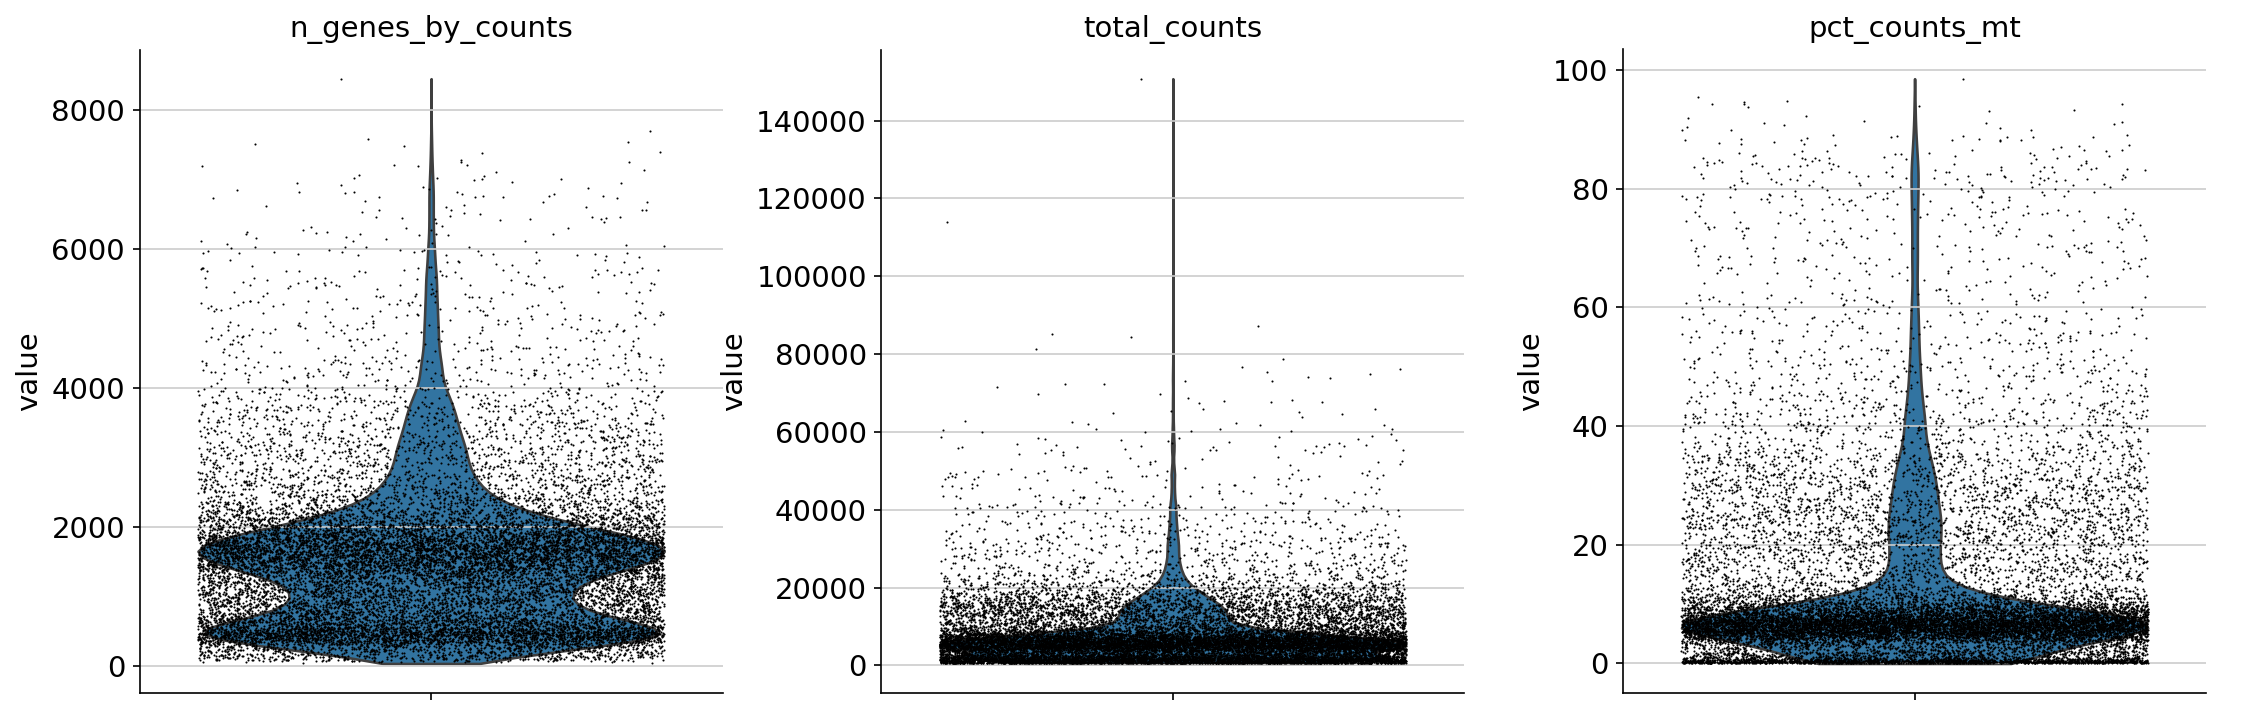

In [24]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

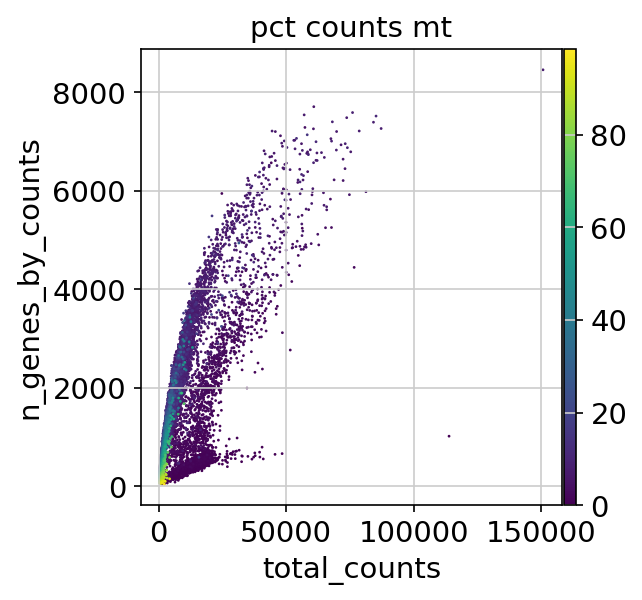

In [25]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [26]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)



---

# Doublet detection

We can remove doublets by either filtering out the cells called as doublets, or waiting until we have done a clustering pass and filtering out any clusters with high doublet scores.

In [27]:
sc.pp.scrublet(adata, batch_key="sample")

In [28]:
import gc

#garbage collector for memory free space
gc.collect()


2887



---

# Normalization

In [29]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

In [30]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)



---
# Feature selection


In [31]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

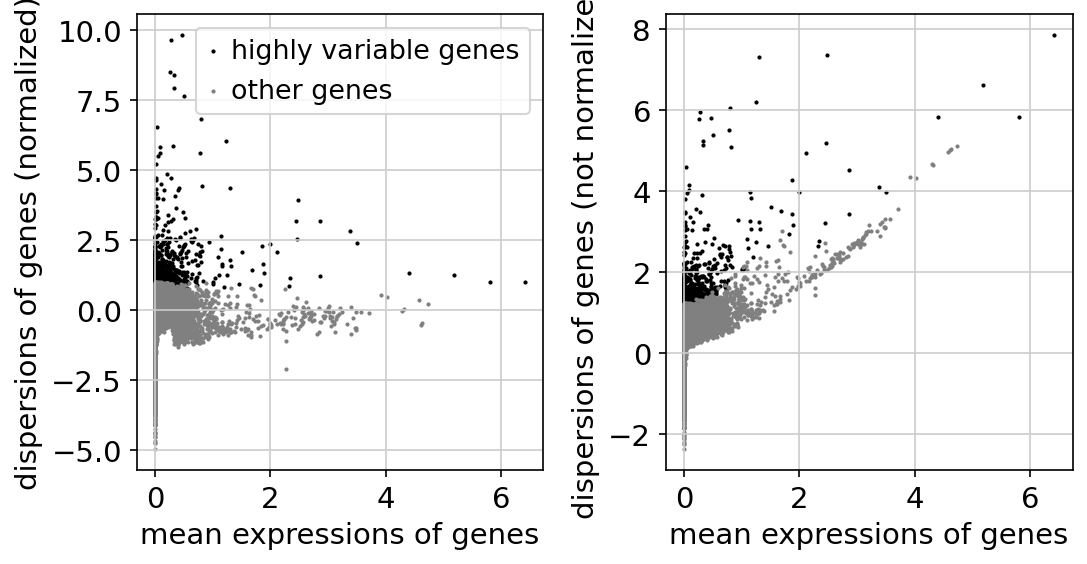

In [32]:
sc.pl.highly_variable_genes(adata)



---
# Dimensionality Reduction


In [33]:
sc.tl.pca(adata)

In [34]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [42]:
adata.obs

sample  n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGGATGGCT-1   s1d1               2103                 7.651596   
AAACCCAAGGCCTAGA-1   s1d1               3916                 8.273081   
AAACCCAAGTGAGTGC-1   s1d1                683                 6.527958   
AAACCCACAAGAGGCT-1   s1d1               4330                 8.373554   
AAACCCACATCGTGGC-1   s1d1                325                 5.786897   
...                   ...                ...                      ...   
TTTGTTGAGAGTCTGG-1   s1d3                277                 5.627621   
TTTGTTGCAGACAATA-1   s1d3               3797                 8.242230   
TTTGTTGCATGTTACG-1   s1d3               3089                 8.035926   
TTTGTTGGTAGTCACT-1   s1d3                379                 5.940171   
TTTGTTGTCGCGCTGA-1   s1d3               1599                 7.377759   

                    total_counts  log1p_total_counts  \
AAACCCAAGGATGGCT-1        8663.0            9.066932   
AAACCCAAGGCCTAGA-1       12853.0            9.461411   
AAACCCAAGTGAGTGC-1        1631.0            7.397562   
AAACCCACAAGAGGCT-1       17345.0            9.761117   
AAACCCACATCGTGGC-1         555.0            6.320768   
...                          ...                 ...   
TTTGTTGAGAGTCTGG-1         615.0            6.423247   
TTTGTTGCAGACAATA-1       13218.0            9.489410   
TTTGTTGCATGTTACG-1       27280.0           10.213945   
TTTGTTGGTAGTCACT-1         698.0            6.549651   
TTTGTTGTCGCGCTGA-1        7358.0            8.903679   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGGATGGCT-1                   42.721921                    59.667552   
AAACCCAAGGCCTAGA-1                   35.843772                    44.262040   
AAACCCAAGTGAGTGC-1                   56.284488                    62.599632   
AAACCCACAAGAGGCT-1                   27.662150                    38.420294   
AAACCCACATCGTGGC-1                   49.909910                    59.459459   
...                                        ...                          ...   
TTTGTTGAGAGTCTGG-1                   63.089431                    71.219512   
TTTGTTGCAGACAATA-1                   30.753518                    44.628537   
TTTGTTGCATGTTACG-1                   64.409824                    71.671554   
TTTGTTGGTAGTCACT-1                   52.865330                    60.028653   
TTTGTTGTCGCGCTGA-1                   49.945637                    68.333786   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACCCAAGGATGGCT-1                    69.744892                    79.348955   
AAACCCAAGGCCTAGA-1                    52.376877                    62.763557   
AAACCCAAGTGAGTGC-1                    70.386266                    88.779890   
AAACCCACAAGAGGCT-1                    48.901701                    62.023638   
AAACCCACATCGTGGC-1                    77.477477                   100.000000   
...                                         ...                          ...   
TTTGTTGAGAGTCTGG-1                    87.479675                   100.000000   
TTTGTTGCAGACAATA-1                    53.691935                    64.684521   
TTTGTTGCATGTTACG-1                    78.317449                    85.054985   
TTTGTTGGTAGTCACT-1                    74.355301                   100.000000   
TTTGTTGTCGCGCTGA-1                    76.297907                    85.063876   

                    total_counts_mt  ...  pct_counts_mt  total_counts_ribo  \
AAACCCAAGGATGGCT-1            460.0  ...       5.309938             3650.0   
AAACCCAAGGCCTAGA-1           1790.0  ...      13.926710             1719.0   
AAACCCAAGTGAGTGC-1            581.0  ...      35.622318               63.0   
AAACCCACAAGAGGCT-1            780.0  ...       4.496973             3936.0   
AAACCCACATCGTGGC-1            159.0  ...      28.648647               26.0   
...                             ...  ...            ...                ...   
TTTGTTGAGAGTC

In [43]:
adata.var

mt   ribo     hb  n_cells_by_counts  mean_counts  \
AL627309.1  False  False  False                 40     0.002336   
AL627309.3  False  False  False                  3     0.000175   
AL627309.5  False  False  False                155     0.009460   
AL627309.4  False  False  False                  7     0.000409   
AP006222.2  False  False  False                  3     0.000234   
...           ...    ...    ...                ...          ...   
AC004556.3  False  False  False                827     0.063358   
AC233755.2  False  False  False                 10     0.000818   
AC233755.1  False  False  False                 45     0.004613   
AC141272.1  False  False  False                  3     0.000175   
AC007325.4  False  False  False                111     0.006599   

            log1p_mean_counts  pct_dropout_by_counts  total_counts  \
AL627309.1           0.002333              99.766423          40.0   
AL627309.3           0.000175              99.982482           3.0   
AL627309.5           0.009415              99.094891         162.0   
AL627309.4           0.000409              99.959124           7.0   
AP006222.2           0.000234              99.982482           4.0   
...                       ...                    ...           ...   
AC004556.3           0.061432              95.170803        1085.0   
AC233755.2           0.000817              99.941606          14.0   
AC233755.1           0.004603              99.737226          79.0   
AC141272.1           0.000175              99.982482           3.0   
AC007325.4           0.006577              99.351825         113.0   

            log1p_total_counts  n_cells  highly_variable     means  \
AL627309.1            3.713572       40            False  0.002273   
AL627309.3            1.386294        3            False  0.000172   
AL627309.5            5.093750      155            False  0.010680   
AL627309.4            2.079442        7            False  0.000433   
AP006222.2            1.609438        3            False  0.000169   
...                        ...      ...              ...       ...   
AC004556.3            6.990256      827            False  0.032039   
AC233755.2            2.708050       10            False  0.000888   
AC233755.1            4.382027       45            False  0.003166   
AC141272.1            1.386294        3            False  0.000069   
AC007325.4            4.736198      111            False  0.003786   

            dispersions  dispersions_norm  highly_variable_nbatches  \
AL627309.1     0.532530         -0.157159                         0   
AL627309.3     0.185008         -0.732898                         0   
AL627309.5     0.894837          0.442095                         0   
AL627309.4     0.255774         -0.617502                         0   
AP006222.2    -0.211524         -1.384603                         0   
...                 ...               ...                       ...   
AC004556.3     0.138279         -0.329590                         0   
AC233755.2     0.504073         -0.207860                         0   
AC233755.1     0.370425         -0.424472                         0   
AC141272.1    -0.927994         -2.579476                         0   
AC007325.4     0.192103         -0.722375                         0   

            highly_variable_intersection  
AL627309.1                         False  
AL627309.3                         False  
AL627309.5                         False  
AL627309.4                         False  
AP006222.2                         False  
...                                  ...  
AC004556.3                         False  
AC233755.2                         False  
AC233755.1                         False  
AC141272.1                         False  
AC007325.4                         False  

[23427 rows x 16 columns]

In [52]:
adata.varm.to_df()

PCs1  PCs2  PCs3  PCs4  PCs5  PCs6  PCs7  PCs8  PCs9  PCs10  ...  \
AL627309.1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
AL627309.3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
AL627309.5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
AL627309.4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
AP006222.2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
AC004556.3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
AC233755.2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
AC233755.1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
AC141272.1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
AC007325.4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   

            PCs41  PCs42  PCs43  PCs44  PCs45  PCs46  PCs47  PCs48  PCs49  \
AL627309.1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
AL627309.3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
AL627309.5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
AL627309.4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
AP006222.2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
AC004556.3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
AC233755.2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
AC233755.1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
AC141272.1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
AC007325.4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

            PCs50  
AL627309.1    0.0  
AL627309.3    0.0  
AL627309.5    0.0  
AL627309.4    0.0  
AP006222.2    0.0  
...           ...  
AC004556.3    0.0  
AC233755.2    0.0  
AC233755.1    0.0  
AC141272.1    0.0  
AC007325.4    0.0  

[23427 rows x 50 columns]

In [53]:
adata.obsm.to_df()

X_pca1    X_pca2    X_pca3    X_pca4    X_pca5  \
AAACCCAAGGATGGCT-1  -2.698767 -1.970926 -0.814903 -1.639985  0.266759   
AAACCCAAGGCCTAGA-1  -5.051105  9.427247 -1.200541 -0.068586 -1.133368   
AAACCCAAGTGAGTGC-1  -2.535399 -1.728049  4.464021  0.684202 -1.809783   
AAACCCACAAGAGGCT-1  -3.846458  1.094164  3.422156  1.893708  0.968253   
AAACCCACATCGTGGC-1   0.211615 -1.380853 -3.171335  1.770171 -1.633672   
...                       ...       ...       ...       ...       ...   
TTTGTTGAGAGTCTGG-1  -0.417665 -2.010725 -2.344878  0.230663 -1.673939   
TTTGTTGCAGACAATA-1  -2.603465  2.929254 -0.008339 -0.678260  0.689446   
TTTGTTGCATGTTACG-1  10.959808  1.590794  0.401371  3.862258 -2.250204   
TTTGTTGGTAGTCACT-1   0.048341 -0.317745 -1.357868 -1.382928 -2.426457   
TTTGTTGTCGCGCTGA-1  -1.955666 -2.546896 -0.894949 -2.193005  0.145198   

                      X_pca6    X_pca7    X_pca8    X_pca9   X_pca10  ...  \
AAACCCAAGGATGGCT-1  2.912764 -0.949091  0.337272 -0.015034 -0.543657  ...   
AAACCCAAGGCCTAGA-1 -0.559440  0.771408  0.198003  0.083887  1.840487  ...   
AAACCCAAGTGAGTGC-1 -3.017768 -1.839802 -1.861586 -0.867307  0.612698  ...   
AAACCCACAAGAGGCT-1  0.455286  0.566493  0.568374  1.419759 -3.130488  ...   
AAACCCACATCGTGGC-1 -3.856884  0.079244  0.583955 -1.737336 -2.213892  ...   
...                      ...       ...       ...       ...       ...  ...   
TTTGTTGAGAGTCTGG-1 -4.859789  2.865108 -1.622125 -1.857015 -0.048478  ...   
TTTGTTGCAGACAATA-1  0.650040  1.574288 -0.268808 -0.591145 -0.651338  ...   
TTTGTTGCATGTTACG-1  4.345297  1.103453 -0.602114 -1.837373 -1.344664  ...   
TTTGTTGGTAGTCACT-1 -2.432108 -0.661734  0.344094 -0.974144  2.782470  ...   
TTTGTTGTCGCGCTGA-1  1.499250  0.305424 -0.717848  0.920633  0.355408  ...   

                     X_pca41   X_pca42   X_pca43   X_pca44   X_pca45  \
AAACCCAAGGATGGCT-1  0.211673  0.510476  0.248195 -0.070020  0.355177   
AAACCCAAGGCCTAGA-1  0.813551  0.230477 -0.137281 -0.320933  0.364443   
AAACCCAAGTGAGTGC-1 -0.339632  0.250717  0.592689 -0.287307 -0.035030   
AAACCCACAAGAGGCT-1 -0.085979 -0.018067 -0.767953 -0.175397 -0.018132   
AAACCCACATCGTGGC-1 -0.962689  0.082461  1.590945  1.004818 -0.127072   
...                      ...       ...       ...       ...       ...   
TTTGTTGAGAGTCTGG-1  1.180954  0.516926  1.557930  0.367036 -0.192630   
TTTGTTGCAGACAATA-1  0.305144  1.146245 -1.695062 -0.100595 -0.701048   
TTTGTTGCATGTTACG-1  0.041043 -0.250969 -0.150390 -0.078937  0.028662   
TTTGTTGGTAGTCACT-1 -0.711478  0.115841  0.252804 -0.074555 -0.244101   
TTTGTTGTCGCGCTGA-1 -0.276555 -0.025479  0.235466 -0.111152 -0.411311   

                     X_pca46   X_pca47   X_pca48   X_pca49   X_pca50  
AAACCCAAGGATGGCT-1 -0.120847 -0.020461 -0.172615  0.164181 -0.583518  
AAACCCAAGGCCTAGA-1 -0.175265 -0.304151 -0.476588 -0.119688  0.236258  
AAACCCAAGTGAGTGC-1  0.437670  0.896325  0.425984  1.044542  0.330860  
AAACCCACAAGAGGCT-1  0.404772 -0.773078  0.187823  0.422467  0.025462  
AAACCCACATCGTGGC-1  0.538400 -1.515721  0.251380  1.199514  0.028749  
...                      ...       ...       ...       ...       ...  
TTTGTTGAGAGTCTGG-1  0.820322  0.388004  0.142514 -0.064821  2.070733  
TTTGTTGCAGACAATA-1  0.448282 -0.501252 -0.318358  0.671201 -0.263357  
TTTGTTGCATGTTACG-1 -0.381504  0.175866 -0.386350 -0.207266  0.467104  
TTTGTTGGTAGTCACT-1  0.036924  0.110499  0.087000 -0.857791 -0.920922  
TTTGTTGTCGCGCTGA-1  0.413903  0.425566  0.287792  0.382831 -0.467710  

[17041 rows x 50 columns]

In [57]:
adata.uns["pca"]

{'params': {'zero_center': True,
  'use_highly_variable': True,
  'mask_var': 'highly_variable'},
 'variance': array([27.65104   , 14.31267   ,  8.100591  ,  4.604246  ,  4.366275  ,
         3.886073  ,  1.8394843 ,  1.5031911 ,  1.2802796 ,  1.098403  ,
         1.0159872 ,  0.9639377 ,  0.88828075,  0.81815255,  0.67161536,
         0.6395928 ,  0.61381125,  0.58128697,  0.5356607 ,  0.52131236,
         0.49923623,  0.48281366,  0.44519585,  0.43944982,  0.42012537,
         0.40954113,  0.40884808,  0.37969542,  0.37434462,  0.36709473,
         0.359588  ,  0.35420662,  0.3490048 ,  0.33326545,  0.32915106,
         0.32498774,  0.315282  ,  0.3104159 ,  0.30626833,  0.30431834,
         0.30090138,  0.29619184,  0.29329354,  0.2873757 ,  0.2791303 ,
         0.2736774 ,  0.27225837,  0.26858684,  0.26642096,  0.26274312],
       dtype=float32),
 'variance_ratio': array([0.19577402, 0.10133611, 0.05735354, 0.03259884, 0.03091396,
        0.02751405, 0.01302386, 0.01064285, 0.0090

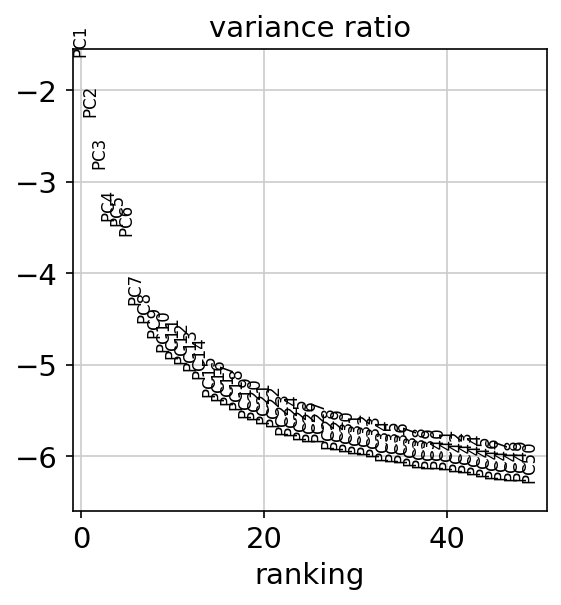

In [58]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

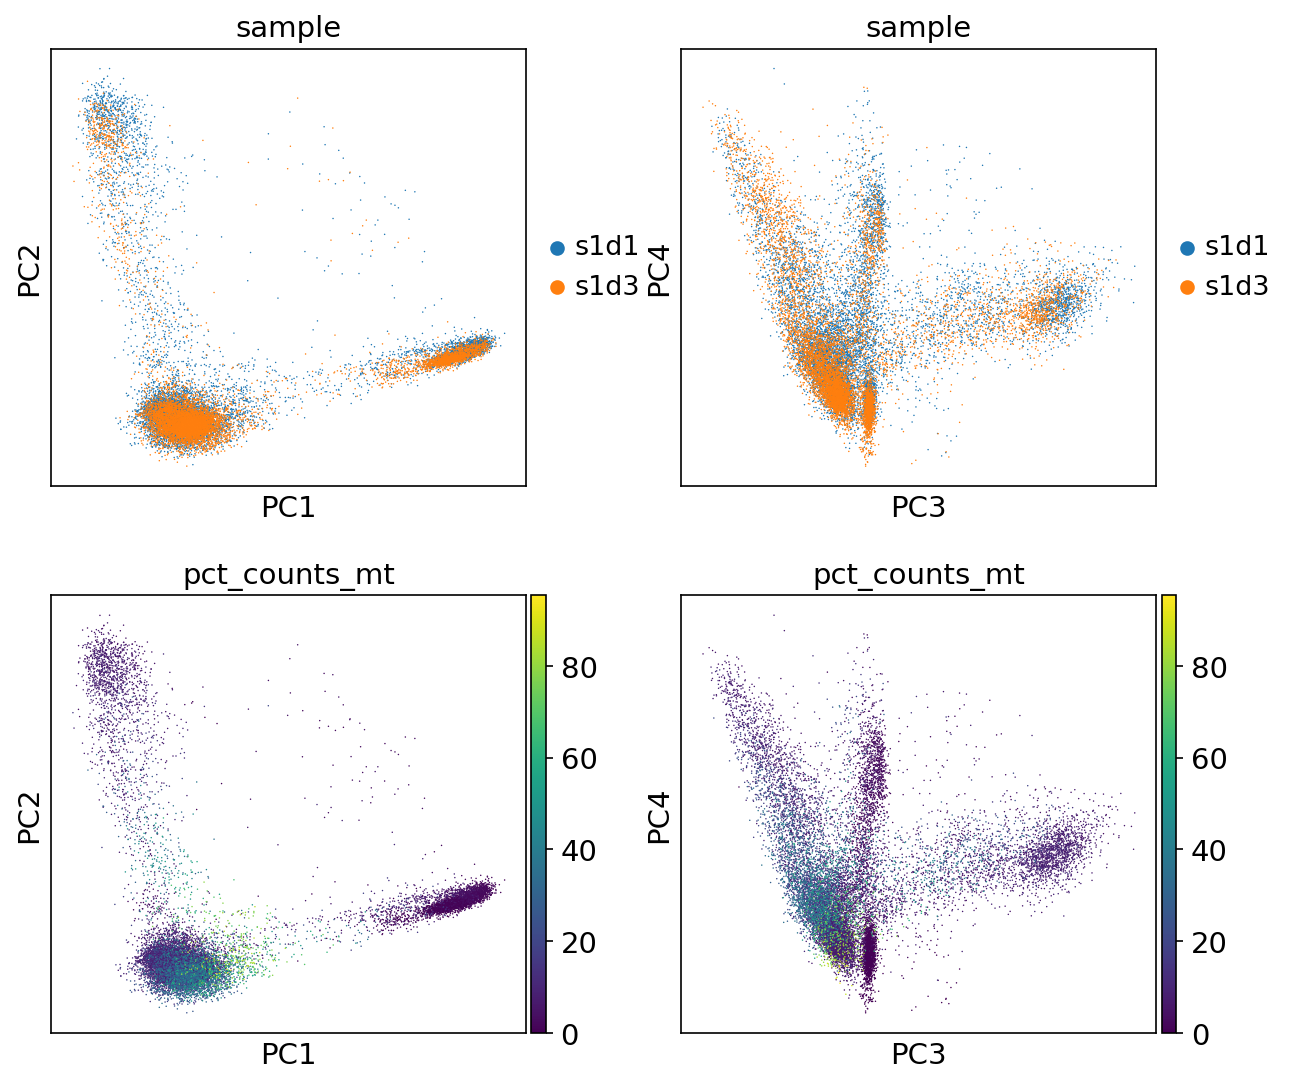

In [59]:
sc.pl.pca(
    adata,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)



---

# Nearest neighbor graph constuction and visualization

In [60]:
sc.pp.neighbors(adata)

In [61]:
sc.tl.umap(adata)

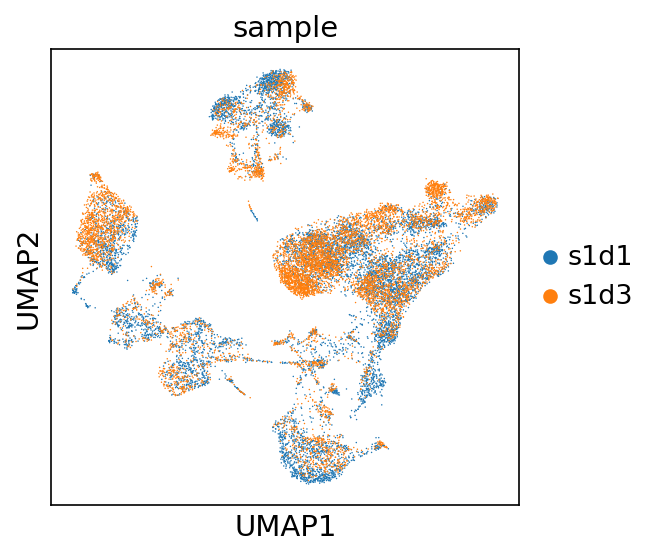

In [62]:
sc.pl.umap(
    adata,
    color="sample",
    # Setting a smaller point size to get prevent overlap
    size=2,
)



---

# Clustering

In [65]:
!pip3 install --q igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.8 MB/s eta 0:00:00


In [66]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

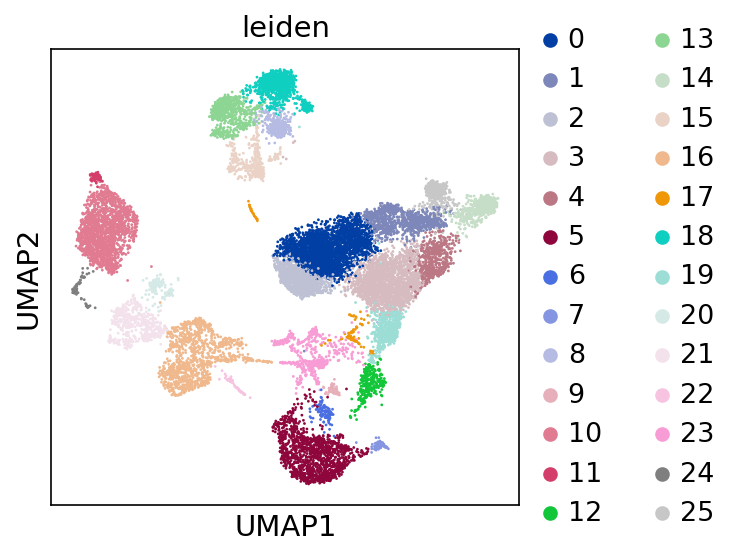

In [67]:
sc.pl.umap(adata, color=["leiden"])



---

# Re-assess quality control and cell filtering

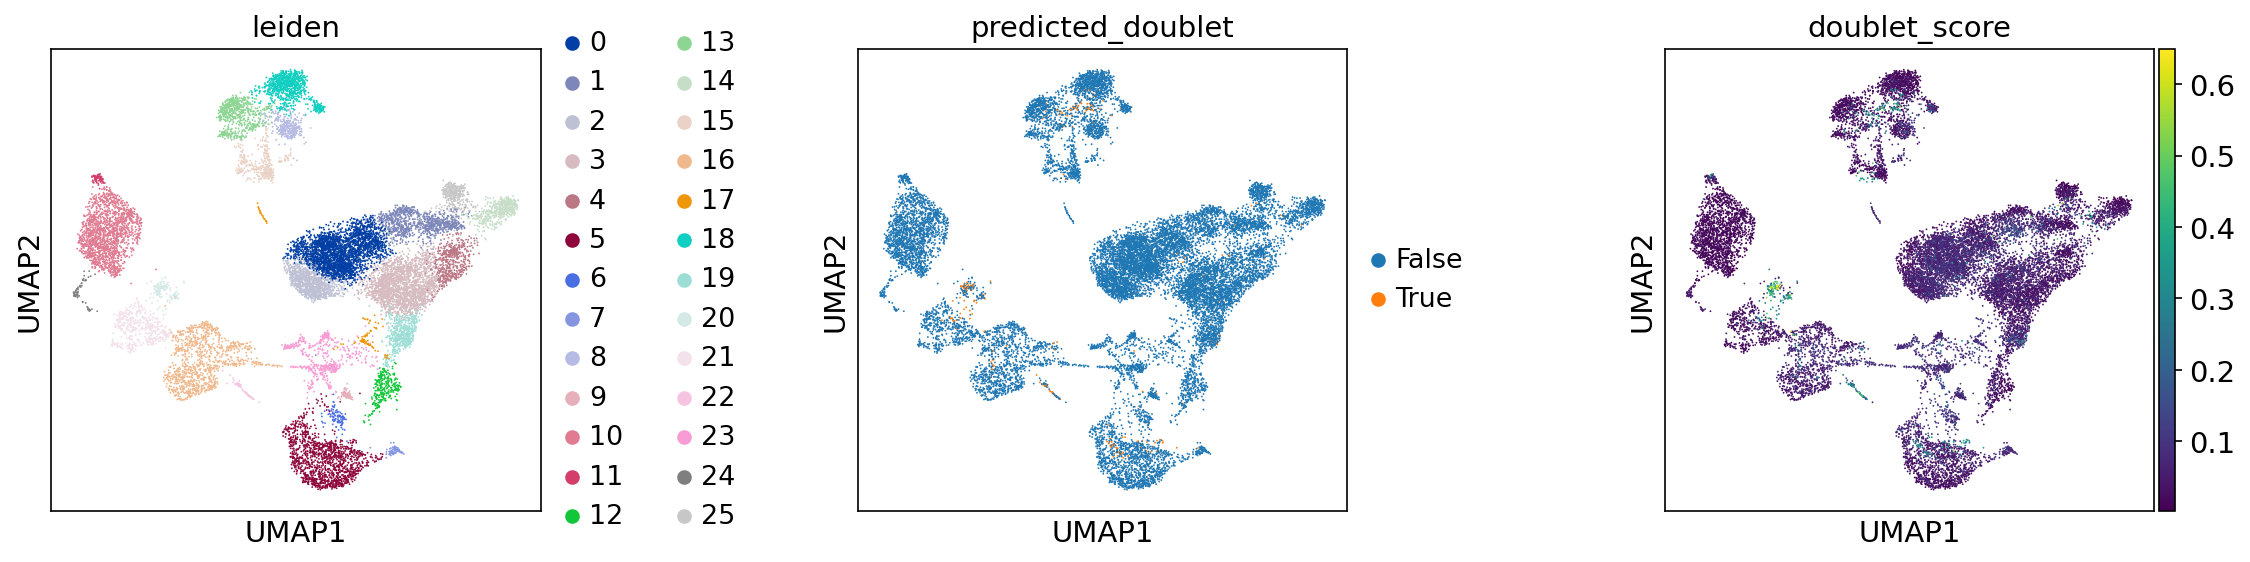

In [68]:
sc.pl.umap(
    adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)

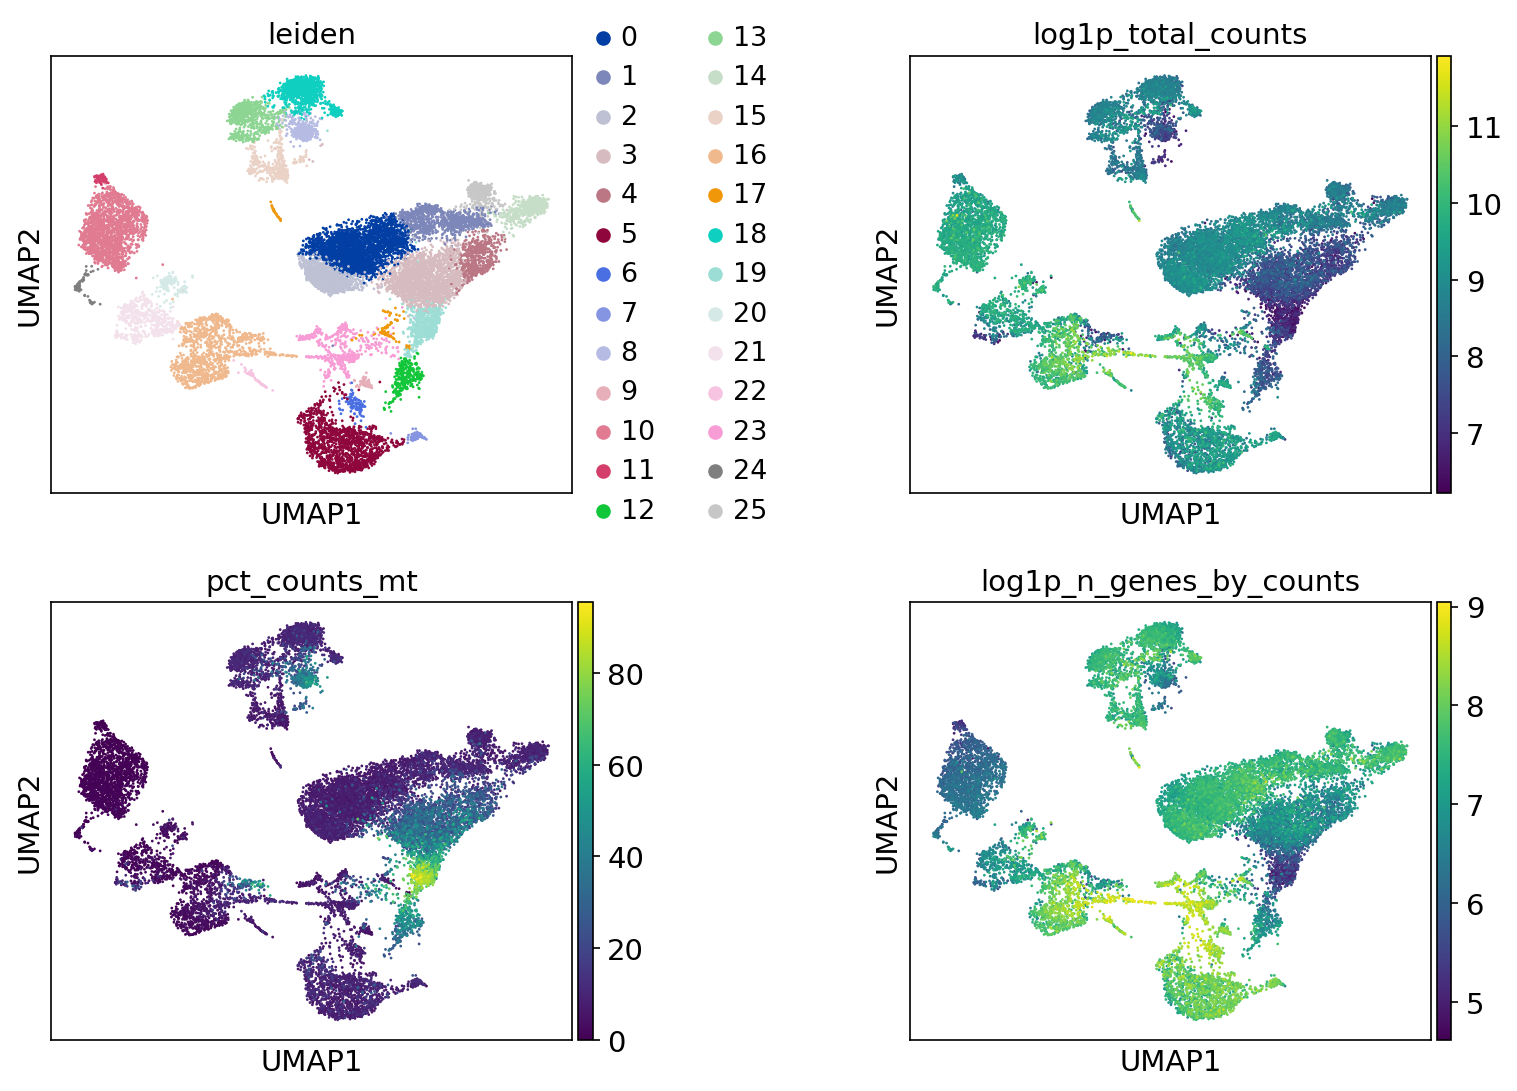

In [69]:
sc.pl.umap(
    adata,
    color=["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace=0.5,
    ncols=2,
)



---

# Manual cell-type annotation

In [70]:
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

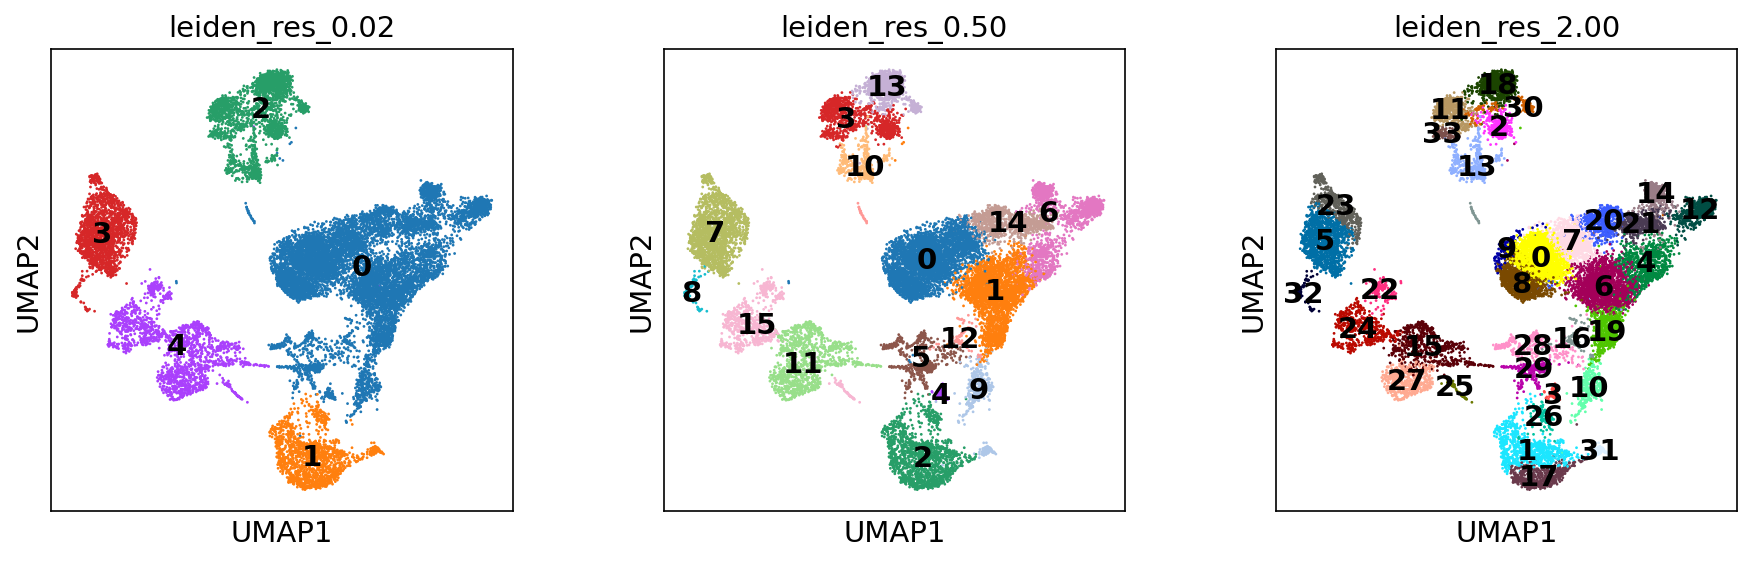

In [71]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)



---

# Marker gene set

In [72]:
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    # Note: DMXL2 should be negative
    "cDC2": ["CST3", "COTL1", "LYZ", "DMXL2", "CLEC10A", "FCER1A"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    # Note HBM and GYPA are negative markers
    "Proerythroblast": ["CDK6", "SYNGR1", "HBM", "GYPA"],
    "NK": ["GNLY", "NKG7", "CD247", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    # Note IGHD and IGHM are negative markers
    "B cells": [
        "MS4A1",
        "ITGB1",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
    ],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    # Note PAX5 is a negative marker
    "Plasmablast": ["XBP1", "PRDM1", "PAX5"],
    "CD4+ T": ["CD4", "IL7R", "TRBC2"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
}

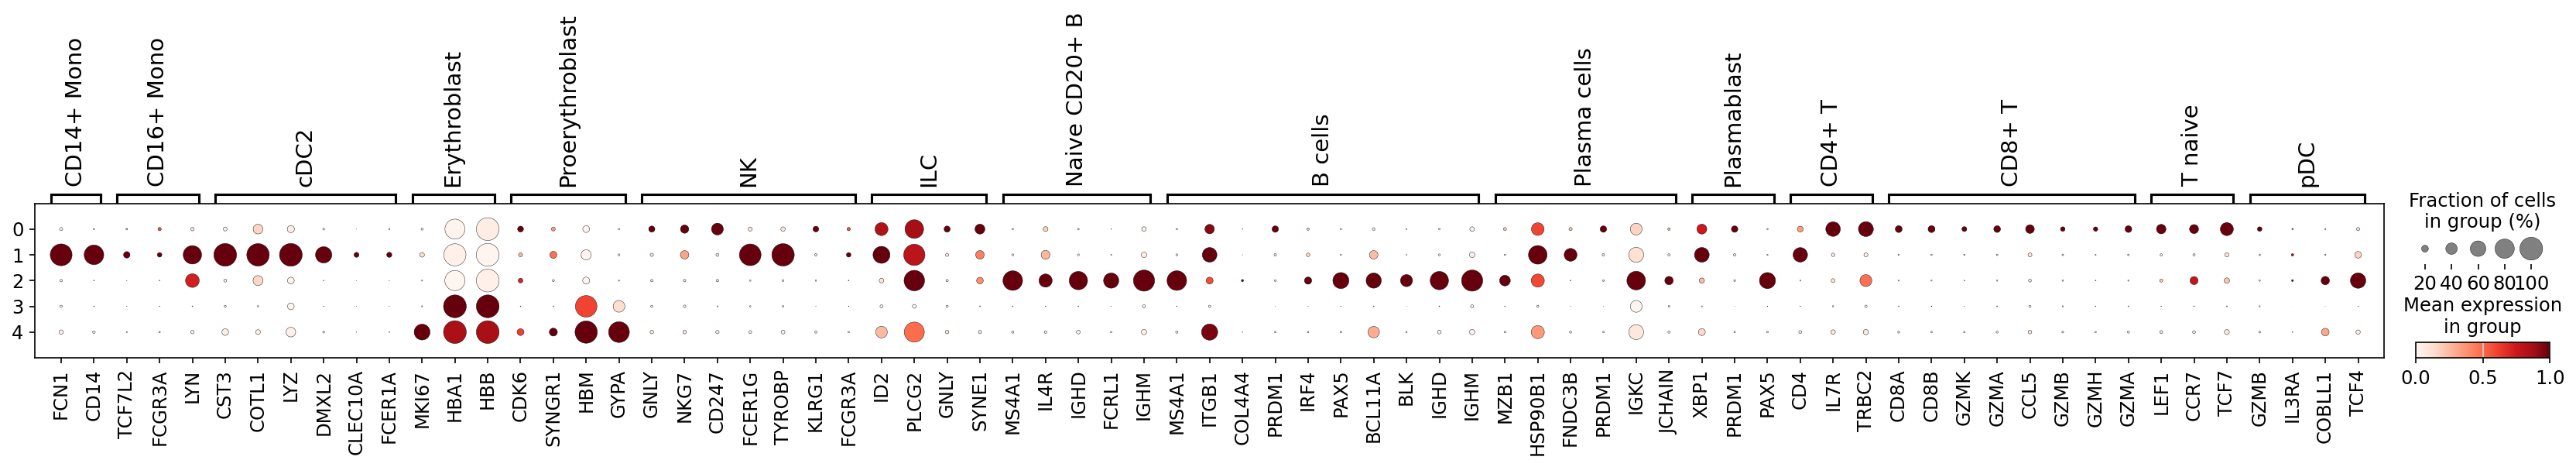

In [73]:
sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_0.02", standard_scale="var")

In [74]:
adata.obs["cell_type_lvl1"] = adata.obs["leiden_res_0.02"].map(
    {
        "0": "T Cells",
        "1": "Monocytes",
        "2": "B Cells",
        "3": "Erythroid",
        "4": "Erythroid"
    }
)

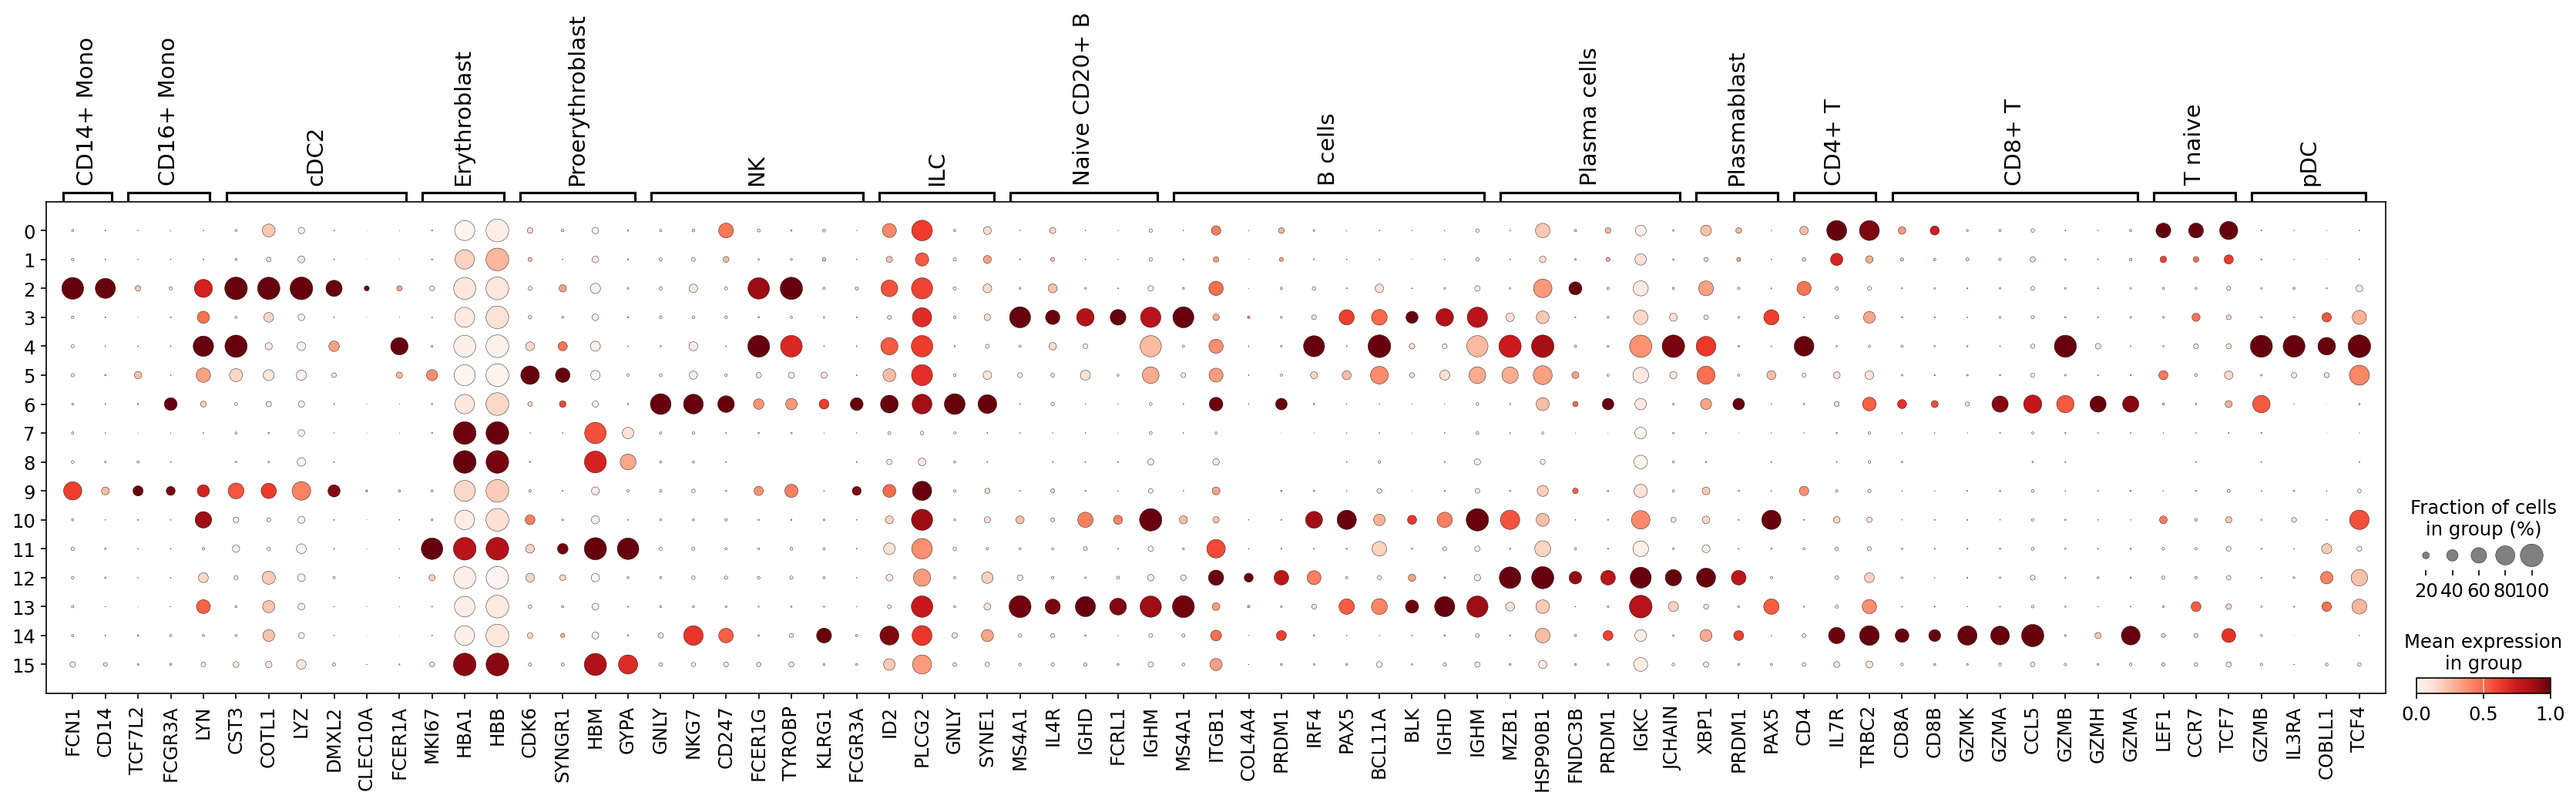

In [75]:
sc.pl.dotplot(adata, marker_genes, groupby="leiden_res_0.50", standard_scale="var")



---
# Differentially-expressed Genes as Markers


In [76]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.50", method="wilcoxon")

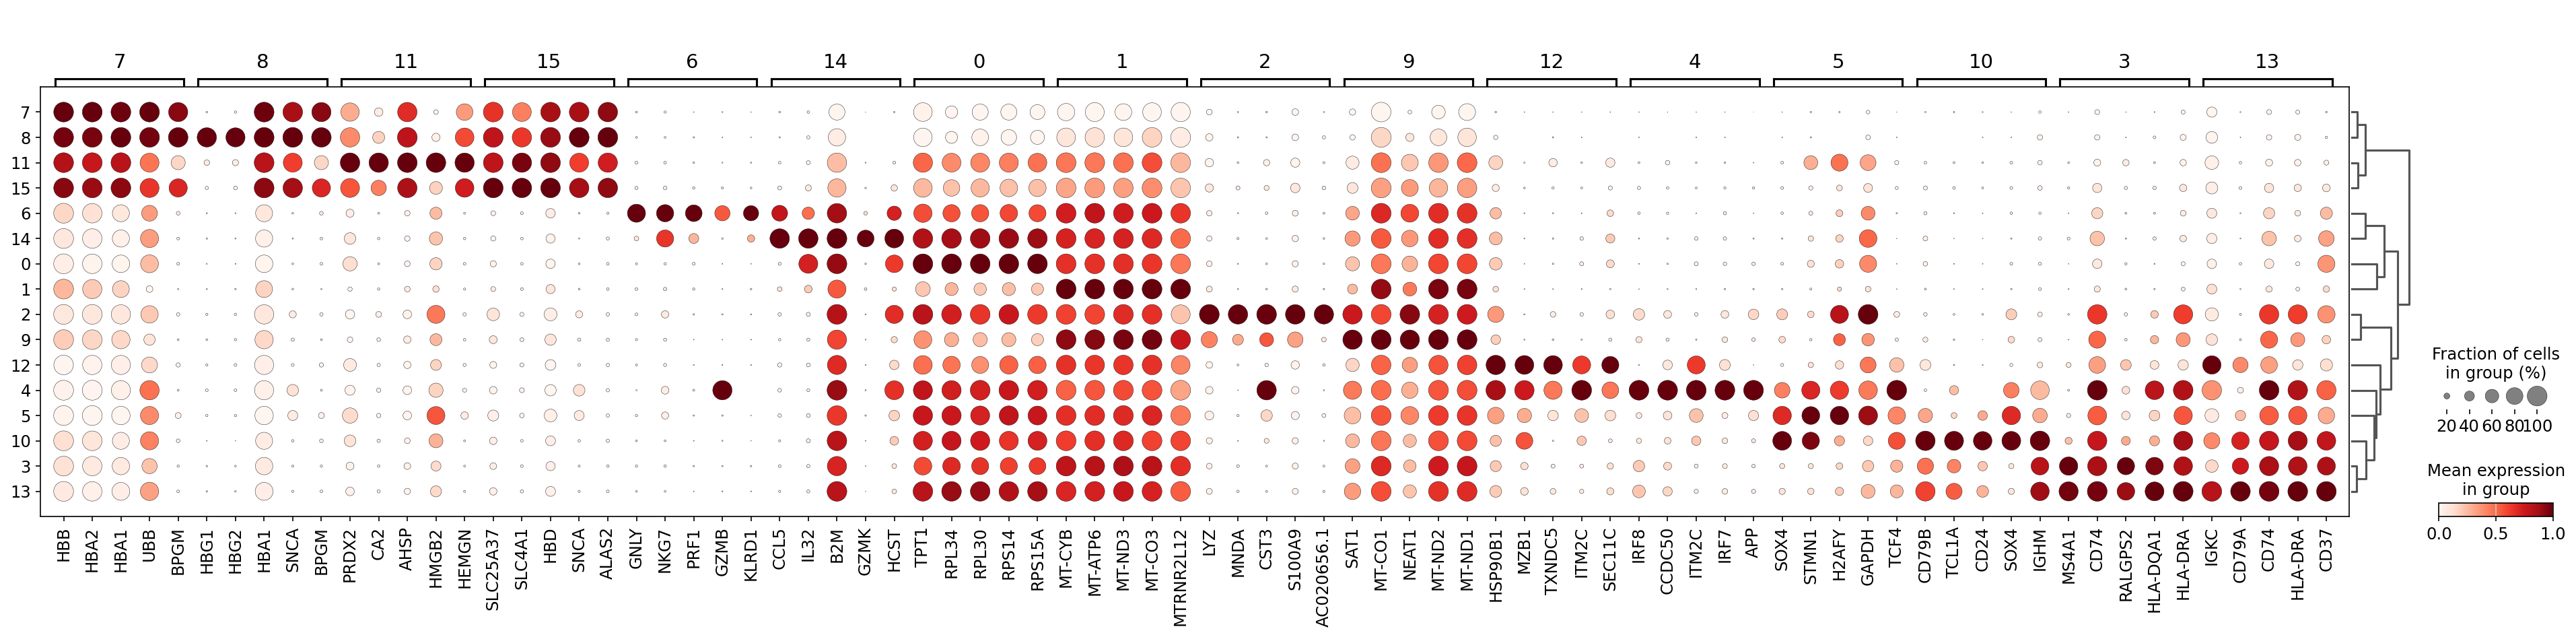

In [77]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0.50", standard_scale="var", n_genes=5
)

In [79]:
sc.get.rank_genes_groups_df(adata, group="6").head(10)

names     scores  logfoldchanges          pvals      pvals_adj
0   GNLY  51.724194        7.577740   0.000000e+00   0.000000e+00
1   NKG7  46.849602        5.865542   0.000000e+00   0.000000e+00
2   PRF1  45.644581        5.716606   0.000000e+00   0.000000e+00
3   GZMB  40.834045        6.612316   0.000000e+00   0.000000e+00
4  KLRD1  40.489574        5.810659   0.000000e+00   0.000000e+00
5  SYNE1  39.728287        3.699611   0.000000e+00   0.000000e+00
6   CCL5  38.820103        4.489878   0.000000e+00   0.000000e+00
7   CCL4  38.030399        4.666891   0.000000e+00   0.000000e+00
8   CST7  37.295712        4.617881  1.925945e-304  5.013235e-301
9   GZMH  36.968525        6.431524  3.670926e-299  8.599878e-296

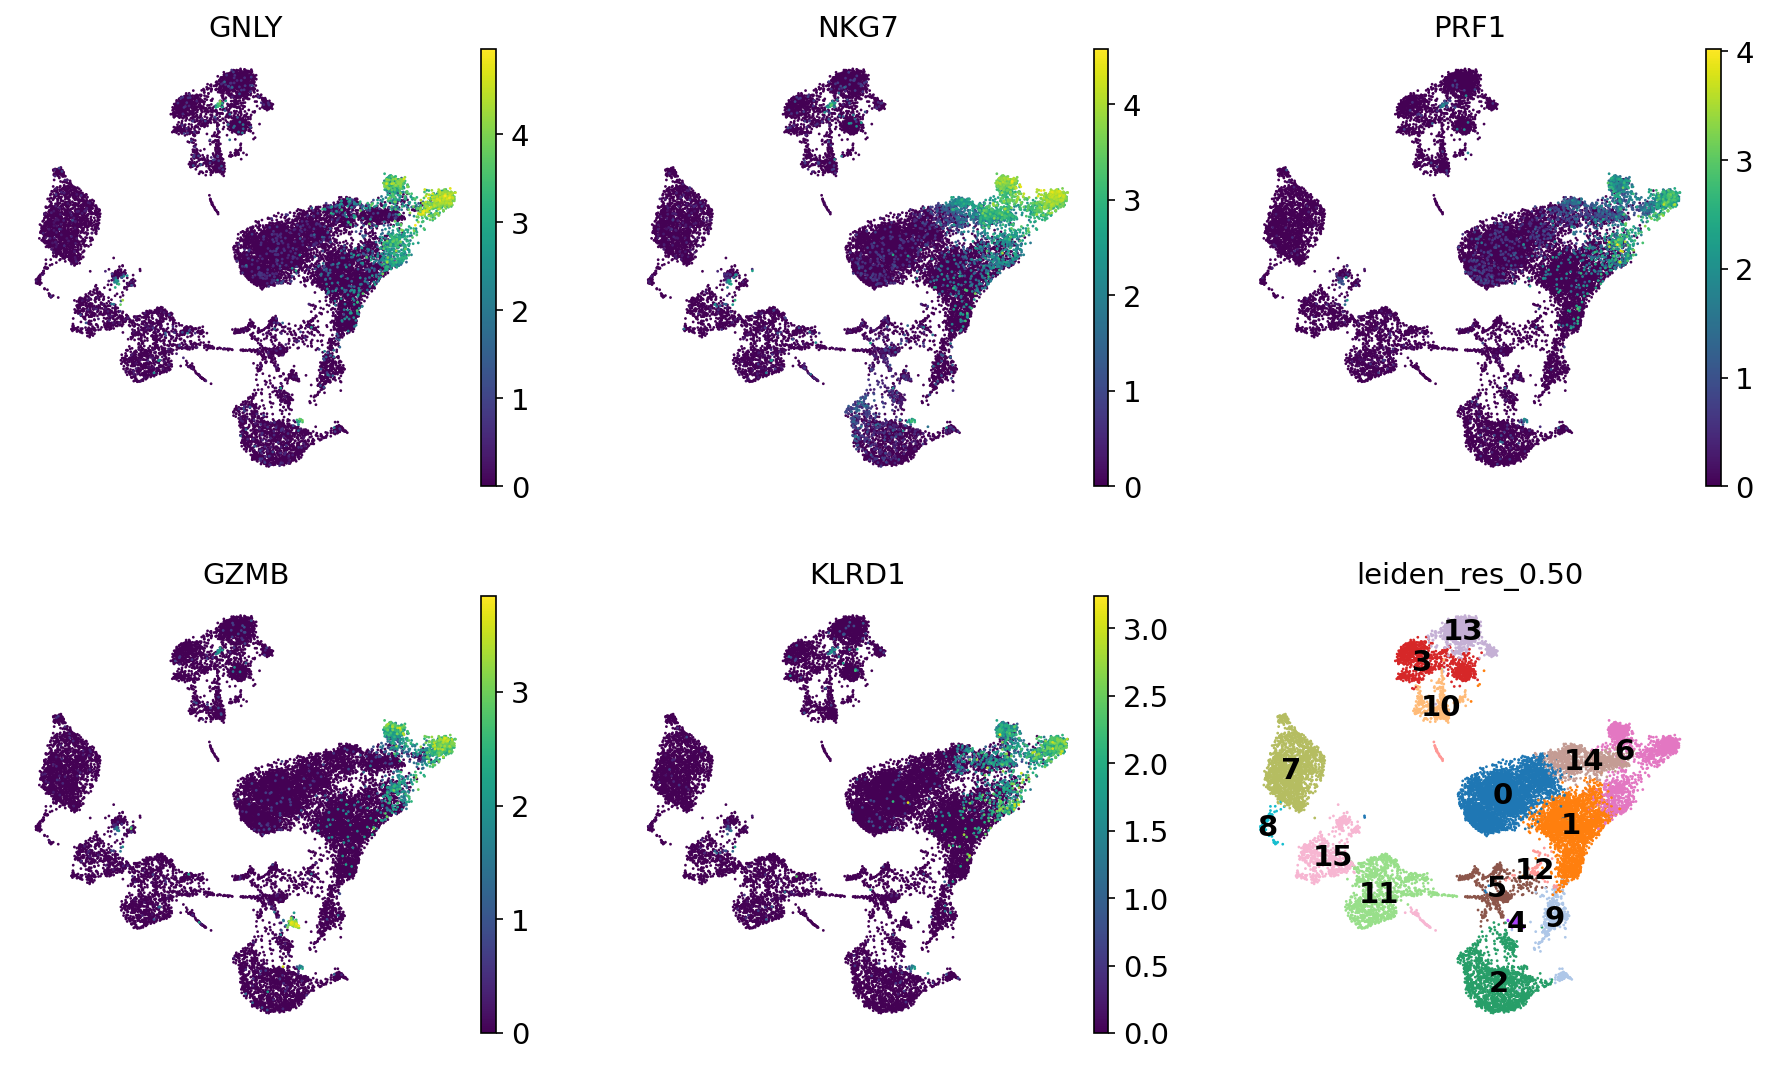

In [80]:
dc_cluster_genes = sc.get.rank_genes_groups_df(adata, group="6").head(5)["names"]
sc.pl.umap(
    adata,
    color=[*dc_cluster_genes, "leiden_res_0.50"],
    legend_loc="on data",
    frameon=False,
    ncols=3,
)

In [81]:
adata

AnnData object with n_obs × n_vars = 17041 × 23427
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res_0.02', 'leiden_res_0.50', 'leiden_res_2.00', 'cell_type_lvl1'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'sample_colors', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'predict

In [83]:
adata.obsp["distances"]

<17041x17041 sparse matrix of type '<class 'numpy.float32'>'
	with 272656 stored elements in Compressed Sparse Row format>

In [84]:
adata.obsp["connectivities"]

<17041x17041 sparse matrix of type '<class 'numpy.float32'>'
	with 383796 stored elements in Compressed Sparse Row format>

In [94]:
adata.obs[["cell_type_lvl1", "leiden_res_2.00", "leiden_res_0.50"]]

cell_type_lvl1 leiden_res_2.00 leiden_res_0.50
AAACCCAAGGATGGCT-1        T Cells               0               0
AAACCCAAGGCCTAGA-1      Monocytes               1               2
AAACCCAAGTGAGTGC-1        B Cells               2               3
AAACCCACAAGAGGCT-1        T Cells               3               4
AAACCCACATCGTGGC-1        T Cells               4               6
...                           ...             ...             ...
TTTGTTGAGAGTCTGG-1        T Cells              19               1
TTTGTTGCAGACAATA-1      Monocytes               1               2
TTTGTTGCATGTTACG-1      Erythroid              27              11
TTTGTTGGTAGTCACT-1        T Cells               6               1
TTTGTTGTCGCGCTGA-1        T Cells               0               0

[17041 rows x 3 columns]